In [353]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clean_data_final_1.22.csv', encoding="latin-1")
df

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_8224/1603014435.py:7: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_data_final_1.22.csv', encoding="latin-1")


,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Accident,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,NaN,Cessna,501,No,2.0,NaN,Personal,1.0,2.0,2.0,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84601,Accident,2022-12-21,"Reserve, LA",United States,Minor,NaN,NaN,GRUMMAN AMERICAN AVN. CORP.,AA-5B,No,1.0,NaN,Instructional,0.0,1.0,1.0,1.0,NaN,NaN,NaN
84602,Accident,2022-12-22,"Brasnorte,",Brazil,Fatal,NaN,NaN,AIR TRACTOR,AT502,No,1.0,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN
84603,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,No,1.0,NaN,Personal,0.0,1.0,1.0,0.0,NaN,NaN,NaN
84604,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84606 entries, 0 to 84605
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      84606 non-null  object 
 1   Event.Date              84606 non-null  object 
 2   Location                84566 non-null  object 
 3   Country                 84400 non-null  object 
 4   Injury.Severity         84606 non-null  object 
 5   Aircraft.damage         83203 non-null  object 
 6   Aircraft.Category       30171 non-null  object 
 7   Make                    84573 non-null  object 
 8   Model                   84549 non-null  object 
 9   Amateur.Built           84548 non-null  object 
 10  Number.of.Engines       84606 non-null  float64
 11  Engine.Type             79111 non-null  object 
 12  Purpose.of.flight       80598 non-null  object 
 13  Total.Fatal.Injuries    84606 non-null  float64
 14  Total.Serious.Injuries  84606 non-null

Separating 'Event.Date' out into 2 columns, 'Year', and 'Month'.

In [355]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month

print(df[['Event.Date', 'Year', 'Month']])

      Event.Date  Year  Month
0     1948-10-24  1948     10
1     1962-07-19  1962      7
2     1974-08-30  1974      8
3     1977-06-19  1977      6
4     1979-08-02  1979      8
...          ...   ...    ...
84601 2022-12-21  2022     12
84602 2022-12-22  2022     12
84603 2022-12-26  2022     12
84604 2022-12-26  2022     12
84605 2022-12-29  2022     12

[84606 rows x 3 columns]


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84606 entries, 0 to 84605
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      84606 non-null  object        
 1   Event.Date              84606 non-null  datetime64[ns]
 2   Location                84566 non-null  object        
 3   Country                 84400 non-null  object        
 4   Injury.Severity         84606 non-null  object        
 5   Aircraft.damage         83203 non-null  object        
 6   Aircraft.Category       30171 non-null  object        
 7   Make                    84573 non-null  object        
 8   Model                   84549 non-null  object        
 9   Amateur.Built           84548 non-null  object        
 10  Number.of.Engines       84606 non-null  float64       
 11  Engine.Type             79111 non-null  object        
 12  Purpose.of.flight       80598 non-null  object

In [561]:
print(df['Injury.Severity'].value_counts())

Injury.Severity
Non-Fatal      66330
Fatal          17801
Minor            211
Serious          168
Unavailable       96
Name: count, dtype: int64


In [562]:
df['Make'] = df['Make'].str.lower()

Cleaning up airbus duplicates, converting airbus industrie and airbus industries to airbus

In [359]:
airbus_mapping = {
    'airbus': 'airbus industries',
    'airbus industrie': 'airbus industries'
}

df['Make'] = df['Make'].replace(airbus_mapping)

Targeting df date range to 2013 to 2023

In [360]:
filtered_df = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

print(filtered_df[['Event.Date', 'Year', 'Month']])

      Event.Date  Year  Month
70205 2013-01-01  2013      1
70206 2013-01-02  2013      1
70207 2013-01-02  2013      1
70208 2013-01-02  2013      1
70209 2013-01-02  2013      1
...          ...   ...    ...
84601 2022-12-21  2022     12
84602 2022-12-22  2022     12
84603 2022-12-26  2022     12
84604 2022-12-26  2022     12
84605 2022-12-29  2022     12

[14401 rows x 3 columns]


Grouping aircraft damage and fatal injuries to get the sum and mean of fatal injuries in aircrafts that were destroyed, had substantial damage, and minor damage. Then plotting the results in a bar graph

In [361]:
damage_v_fatalities = filtered_df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].agg(['sum','mean']).reset_index()
print(damage_v_fatalities)

  Aircraft.damage     sum      mean
0       Destroyed  6184.0  2.960268
1           Minor    16.0  0.141593
2     Substantial  2420.0  0.205800


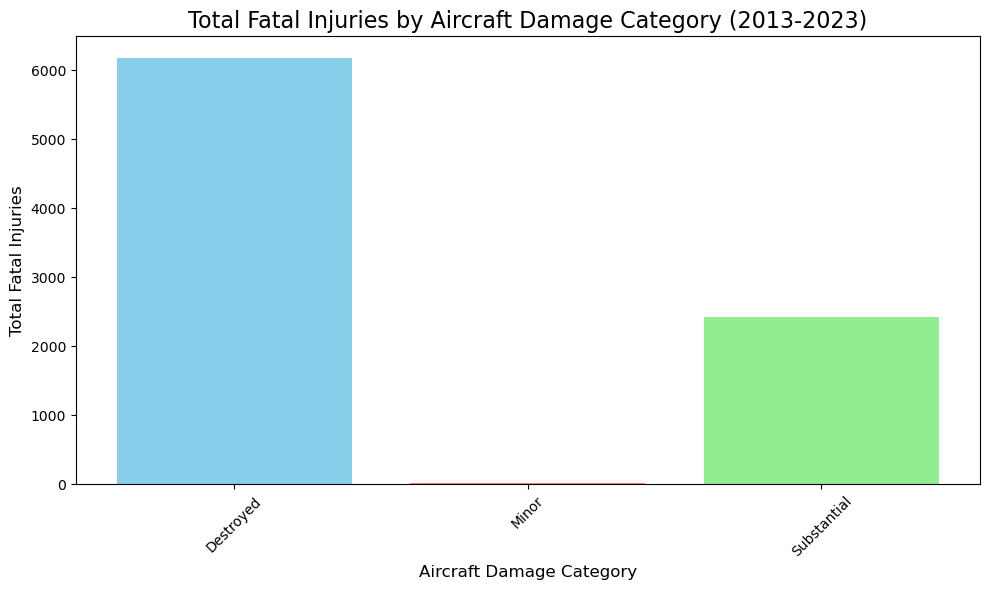

In [362]:
plt.figure(figsize=(10, 6))
plt.bar(damage_v_fatalities['Aircraft.damage'], damage_v_fatalities['sum'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Total Fatal Injuries by Aircraft Damage Category (2013-2023)', fontsize=16)
plt.xlabel('Aircraft Damage Category', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Looking at aircraft.damge and total.fatal.injuries yoy as a list index. Looking at the same data as pivot index. Plotting the findings of the pivot index as a stacked bar graph

In [363]:
yearly_damage_fatalities = (
    filtered_df.groupby(['Year', 'Aircraft.damage'])['Total.Fatal.Injuries']
    .sum()
    .reset_index()
)
print(yearly_damage_fatalities.head())

   Year Aircraft.damage  Total.Fatal.Injuries
0  2013       Destroyed                 554.0
1  2013           Minor                   2.0
2  2013     Substantial                 260.0
3  2014       Destroyed                1146.0
4  2014           Minor                   0.0


In [364]:
pivot_yearly_damage = yearly_damage_fatalities.pivot(
    index='Year', columns='Aircraft.damage', values='Total.Fatal.Injuries'
).fillna(0)

print(pivot_yearly_damage)

Aircraft.damage  Destroyed  Minor  Substantial
Year                                          
2013                 554.0    2.0        260.0
2014                1146.0    0.0        279.0
2015                 843.0    8.0        233.0
2016                 561.0    0.0        254.0
2017                 359.0    1.0        268.0
2018                 782.0    1.0        251.0
2019                 665.0    2.0        279.0
2020                 568.0    0.0        188.0
2021                 328.0    0.0        183.0
2022                 378.0    2.0        225.0


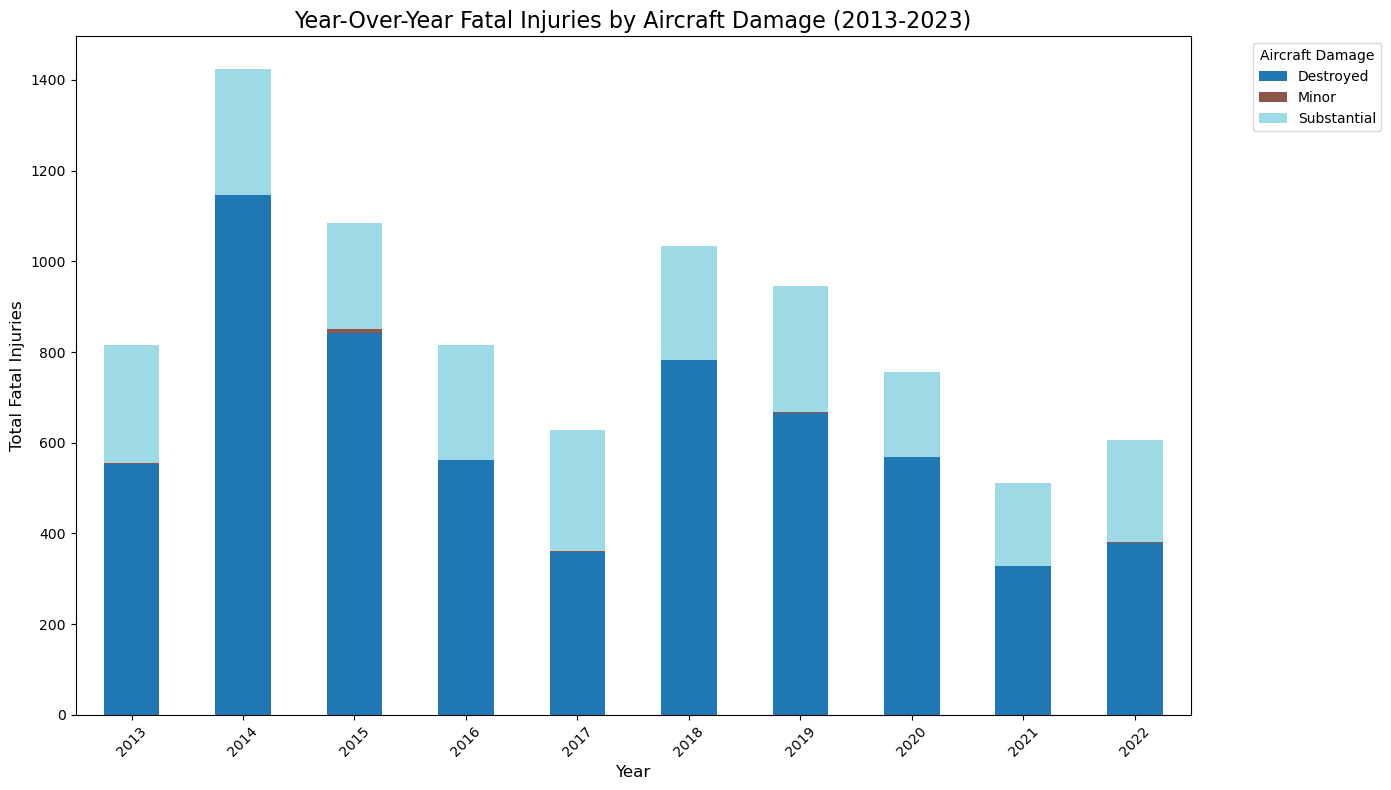

In [365]:
pivot_yearly_damage.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Year-Over-Year Fatal Injuries by Aircraft Damage (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [366]:
damage_make_fatalities = (
    filtered_df.groupby(['Year', 'Make', 'Aircraft.damage'])['Total.Fatal.Injuries']
    .sum()
    .reset_index()
)
damage_make_fatalities

,Year,Make,Aircraft.damage,Total.Fatal.Injuries
0,2013,781569 inc,Substantial,0.0
1,2013,adolphson,Substantial,0.0
2,2013,aero commander,Substantial,0.0
3,2013,aero vodochody,Substantial,0.0
4,2013,aeronca,Destroyed,2.0
...,...,...,...,...
4073,2022,wren ronnie d,Substantial,2.0
4074,2022,yakovlev,Destroyed,1.0
4075,2022,yakovlev,Substantial,0.0
4076,2022,yates mike e,Substantial,0.0


In the above graph data stops for Airbus after 2020. The next 2-3 cells will be data pertaining to Airbus, followed by Beech (data stops 2019), Piper, and Cesna. Their low fatal injuries might indicate that they're strong companies to work with.

A chunk of my data, including the data to show the downward trends of incidents that was used in the presentation was lost yesterday (1/23. I'm not sure what I did.

Next section is a copy and paste of aircraft.damage and total.fatal.injuries, but I swapped out fatal injuries for serious injuries. In hindsight it was double work. I should've included serious injuries in the initial groupby along with fatal injuries. Cost me a lot of time, won't make that mistake again.

In [376]:
damage_vs_serious = filtered_df.groupby('Aircraft.damage')['Total.Serious.Injuries'].agg(['sum','mean']).reset_index()
print(damage_vs_serious)

  Aircraft.damage     sum      mean
0       Destroyed   372.0  0.178076
1           Minor    37.0  0.327434
2     Substantial  3902.0  0.331831


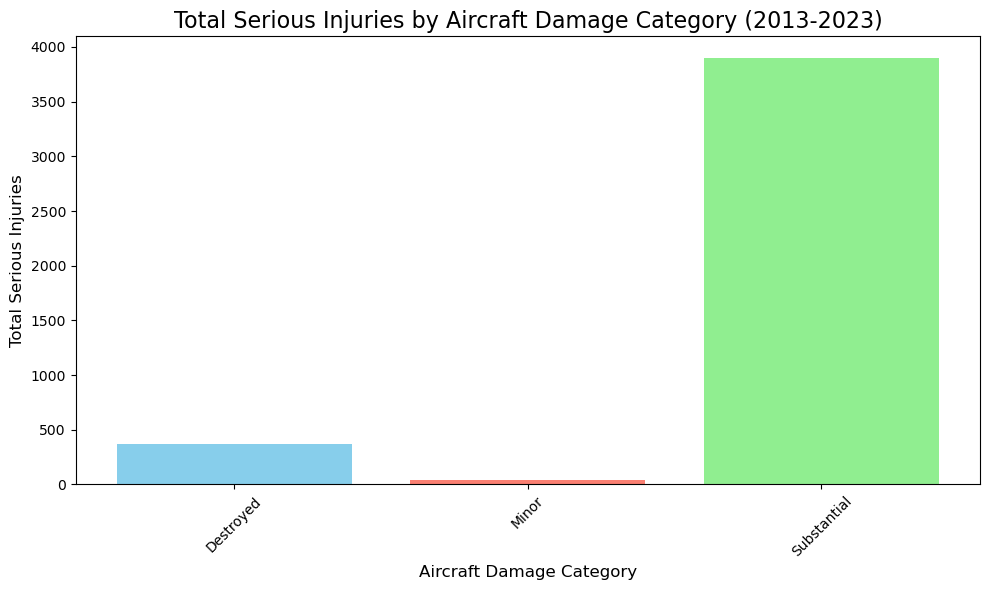

In [377]:
plt.figure(figsize=(10, 6))
plt.bar(damage_vs_serious['Aircraft.damage'], damage_vs_serious['sum'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Total Serious Injuries by Aircraft Damage Category (2013-2023)', fontsize=16)
plt.xlabel('Aircraft Damage Category', fontsize=12)
plt.ylabel('Total Serious Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [378]:
yearly_damage_serious = (
    filtered_df.groupby(['Year', 'Aircraft.damage'])['Total.Serious.Injuries']
    .sum()
    .reset_index()
)
print(yearly_damage_serious.head())

   Year Aircraft.damage  Total.Serious.Injuries
0  2013       Destroyed                   164.0
1  2013           Minor                    16.0
2  2013     Substantial                   444.0
3  2014       Destroyed                    13.0
4  2014           Minor                     1.0


In [379]:
pivot_yearly_damage_serious = yearly_damage_serious.pivot(
    index='Year', columns='Aircraft.damage', values='Total.Serious.Injuries'
).fillna(0)

print(pivot_yearly_damage_serious)

Aircraft.damage  Destroyed  Minor  Substantial
Year                                          
2013                 164.0   16.0        444.0
2014                  13.0    1.0        396.0
2015                  22.0    1.0        410.0
2016                  28.0    0.0        406.0
2017                  25.0    2.0        369.0
2018                  49.0    3.0        498.0
2019                  30.0    7.0        330.0
2020                  21.0    4.0        450.0
2021                  15.0    0.0        283.0
2022                   5.0    3.0        316.0


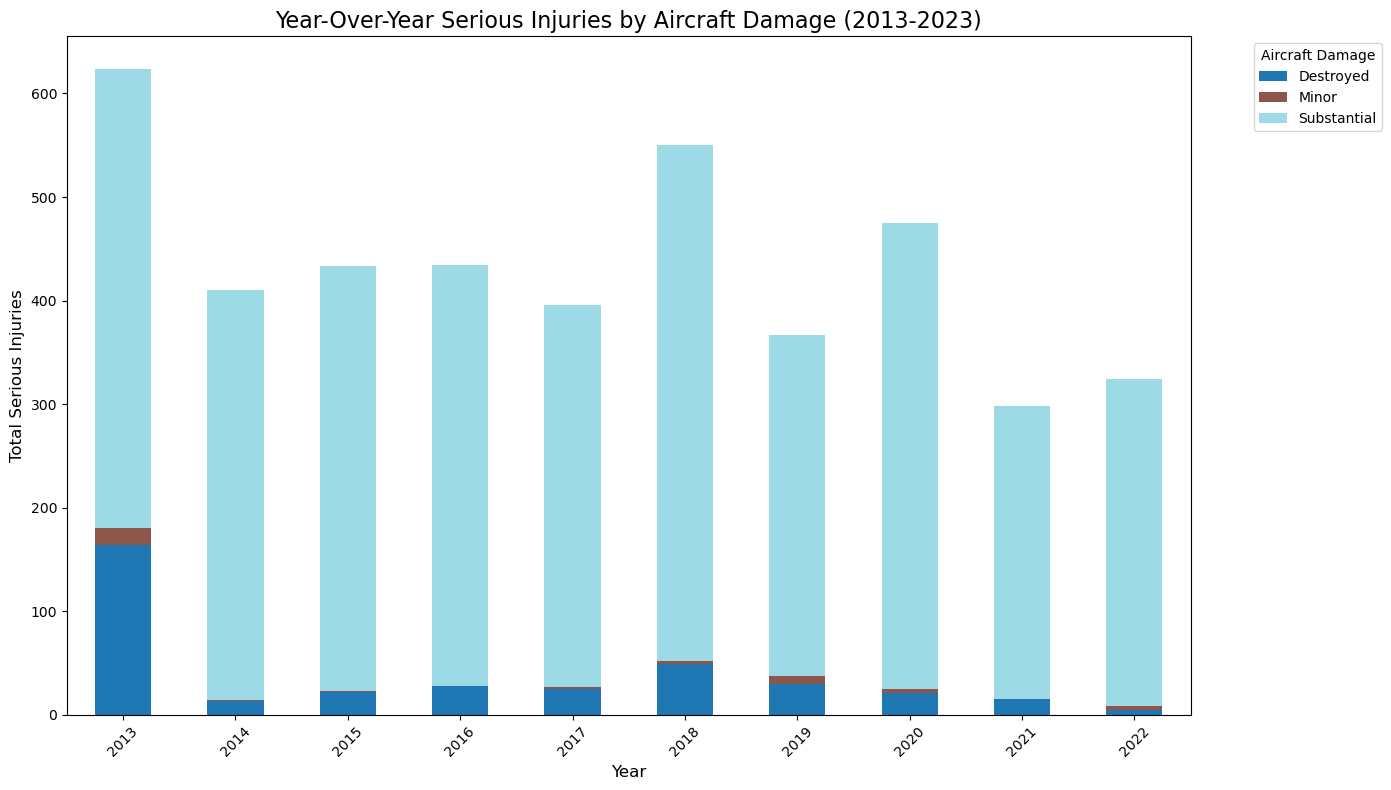

In [380]:
pivot_yearly_damage_serious.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Year-Over-Year Serious Injuries by Aircraft Damage (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Serious Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Missed some cleaning in the Make column. Updated my filtered_df to change the letters to all Caps, I used the * wildcard to match the characters at the beginning and end of the string. And any make containing the five makes I wanted to look that had additional characters would be replaced with AIRBUS, BOEING, CESSNA, PIPER, BEECH

In [389]:
filtered_df['Make'] = df['Make'].str.upper().replace(r'.*\b(AIRBUS|BOEING|CESSNA|PIPER|BEECH)\b.*', r'\1', regex=True)


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_8224/565155406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Make'] = df['Make'].str.upper().replace(r'.*\b(AIRBUS|BOEING|CESSNA|PIPER|BEECH)\b.*', r'\1', regex=True)


In [390]:
filtered_df['Make'].value_counts().head(50)

Make
CESSNA                            3665
PIPER                             2153
BEECH                              767
BELL                               416
BOEING                             274
ROBINSON                           271
MOONEY                             184
AIR TRACTOR INC                    146
CIRRUS DESIGN CORP                 135
ROBINSON HELICOPTER                127
ROBINSON HELICOPTER COMPANY        125
VANS                               119
AIR TRACTOR                        111
AERONCA                            109
BELLANCA                           108
MAULE                              102
AIRBUS                             102
CHAMPION                            97
HUGHES                              96
CIRRUS                              92
SCHWEIZER                           82
STINSON                             75
LUSCOMBE                            70
EUROCOPTER                          64
GRUMMAN                             63
NORTH AMERICAN      

In [391]:
filtered_rows = filtered_df[filtered_df['Make'].isin(['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH'])]
(filtered_rows)

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Month
70205,Accident,2013-01-01,"Chiloquin, OR",United States,Non-Fatal,Substantial,Airplane,CESSNA,182P,No,...,Instructional,0.0,0.0,0.0,2.0,VMC,NaN,The flight instructorÂs failure to maintain a...,2013,1
70206,Accident,2013-01-02,"North Las Vegas, NV",United States,Non-Fatal,Substantial,Airplane,PIPER,PA-60-602P,No,...,Instructional,0.0,0.0,0.0,2.0,VMC,NaN,The pilotÂs failure to maintain an adequate d...,2013,1
70208,Accident,2013-01-02,"Jasper, AL",United States,Fatal,Destroyed,Airplane,PIPER,PA-30,No,...,Personal,3.0,0.0,0.0,0.0,IMC,NaN,The student pilotÂs poor judgment to take a m...,2013,1
70217,Accident,2013-01-04,"Palm Coast, FL",United States,Fatal,Destroyed,Airplane,BEECH,H35,No,...,Personal,3.0,0.0,0.0,0.0,IMC,NaN,A total loss of engine power after the failure...,2013,1
70218,Accident,2013-01-04,"Palmer, AK",United States,Non-Fatal,Substantial,Airplane,PIPER,PA-18-150,No,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's selection of unsuitable terrain fo...,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84597,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,CESSNA,R172K,No,...,Personal,0.0,1.0,1.0,0.0,VMC,NaN,NaN,2022,12
84599,Accident,2022-12-18,"San Manual, AZ",United States,Non-Fatal,NaN,NaN,PIPER,PA28,No,...,Personal,0.0,0.0,0.0,3.0,NaN,NaN,NaN,2022,12
84600,Accident,2022-12-21,"Auburn Hills, MI",United States,Minor,NaN,NaN,CESSNA,172F,No,...,Personal,0.0,1.0,1.0,0.0,NaN,NaN,NaN,2022,12
84603,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,No,...,Personal,0.0,1.0,1.0,0.0,NaN,NaN,NaN,2022,12


In [417]:
df.to_csv("jan_22_project_df.csv", index=False)

Gathering sum of each of the injury columns

In [434]:
total_inj = df.loc[:, ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
print(total_inj)

Total.Fatal.Injuries      50123.0
Total.Serious.Injuries    21055.0
Total.Minor.Injuries      21055.0
dtype: float64


In [435]:
yearly_injuries_df = df.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

print(yearly_injuries_df)


      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries
Year                                                                    
1948                   2.0                     0.0                   0.0
1962                   4.0                     0.0                   0.0
1974                   3.0                     0.0                   0.0
1977                   2.0                     0.0                   0.0
1979                   1.0                     2.0                   2.0
1981                   4.0                     0.0                   0.0
1982                1584.0                   726.0                 726.0
1983                1273.0                   673.0                 673.0
1984                1226.0                   696.0                 696.0
1985                1646.0                   611.0                 611.0
1986                1180.0                   619.0                 619.0
1987                1235.0                   554.0 

In [437]:
print(yearly_injuries_df['Total.Serious.Injuries'])

Year
1948      0.0
1962      0.0
1974      0.0
1977      0.0
1979      2.0
1981      0.0
1982    726.0
1983    673.0
1984    696.0
1985    611.0
1986    619.0
1987    554.0
1988    620.0
1989    518.0
1990    589.0
1991    535.0
1992    609.0
1993    505.0
1994    529.0
1995    479.0
1996    532.0
1997    497.0
1998    388.0
1999    491.0
2000    501.0
2001    478.0
2002    431.0
2003    480.0
2004    457.0
2005    426.0
2006    418.0
2007    402.0
2008    650.0
2009    552.0
2010    587.0
2011    470.0
2012    438.0
2013    656.0
2014    451.0
2015    462.0
2016    459.0
2017    425.0
2018    567.0
2019    384.0
2020    493.0
2021    334.0
2022    361.0
Name: Total.Serious.Injuries, dtype: float64


In [438]:
yearly_injuries_df.fillna(0, inplace=True)

In [439]:
yearly_injuries_df.mean()

Total.Fatal.Injuries      1066.446809
Total.Serious.Injuries     447.978723
Total.Minor.Injuries       447.978723
dtype: float64

In [440]:
yearly_injuries_df.median()

Total.Fatal.Injuries      1183.0
Total.Serious.Injuries     480.0
Total.Minor.Injuries       480.0
dtype: float64

In [442]:
df_1980 = df[df['Year'] >= 1982]

In [443]:
yearly_injuries_1980 = df_1980.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
print(yearly_injuries_1980)

      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries
Year                                                                    
1982                1584.0                   726.0                 726.0
1983                1273.0                   673.0                 673.0
1984                1226.0                   696.0                 696.0
1985                1646.0                   611.0                 611.0
1986                1180.0                   619.0                 619.0
1987                1235.0                   554.0                 554.0
1988                1194.0                   620.0                 620.0
1989                1532.0                   518.0                 518.0
1990                 999.0                   589.0                 589.0
1991                1087.0                   535.0                 535.0
1992                1271.0                   609.0                 609.0
1993                 865.0                   505.0 

In [445]:
yearly_injuries_1980_mean = df_1980.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].mean()
print(yearly_injuries_1980_mean)

      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries
Year                                                                    
1982              0.455959                0.208981              0.208981
1983              0.372331                0.196841              0.196841
1984              0.368833                0.209386              0.209386
1985              0.549216                0.203871              0.203871
1986              0.422788                0.221784              0.221784
1987              0.455216                0.204202              0.204202
1988              0.460116                0.238921              0.238921
1989              0.623525                0.210826              0.210826
1990              0.407589                0.240310              0.240310
1991              0.452728                0.222824              0.222824
1992              0.555022                0.265939              0.265939
1993              0.387371                0.226153 

In [447]:
total_inj_2013 = filtered_df.loc[:, ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()
print(total_inj_2013)

Total.Fatal.Injuries      8786.0
Total.Serious.Injuries    4592.0
Total.Minor.Injuries      4592.0
dtype: float64


In [448]:
yearly_injuries_2013_23 = filtered_df.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

print(yearly_injuries_2013_23)

      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries
Year                                                                    
2013                 822.0                   656.0                 656.0
2014                1428.0                   451.0                 451.0
2015                1101.0                   462.0                 462.0
2016                 820.0                   459.0                 459.0
2017                 640.0                   425.0                 425.0
2018                1044.0                   567.0                 567.0
2019                 960.0                   384.0                 384.0
2020                 768.0                   493.0                 493.0
2021                 571.0                   334.0                 334.0
2022                 632.0                   361.0                 361.0


In [450]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
df_makes = filtered_df[filtered_df['Make'].isin(selected_makes)]

In [451]:
yearly_injuries_by_make = (
    df_makes.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]
    .sum()
    .reset_index()
)

print(yearly_injuries_by_make.head(10))

   Year    Make  Total.Fatal.Injuries  Total.Serious.Injuries  \
0  2013  AIRBUS                   6.0                    14.0   
1  2013   BEECH                  77.0                    31.0   
2  2013  BOEING                  70.0                   181.0   
3  2013  CESSNA                 156.0                   116.0   
4  2013   PIPER                 113.0                    60.0   
5  2014  AIRBUS                 166.0                     6.0   
6  2014   BEECH                  36.0                    13.0   
7  2014  BOEING                 536.0                    52.0   
8  2014  CESSNA                 152.0                    97.0   
9  2014   PIPER                 109.0                    57.0   

   Total.Minor.Injuries  
0                  14.0  
1                  31.0  
2                 181.0  
3                 116.0  
4                  60.0  
5                   6.0  
6                  13.0  
7                  52.0  
8                  97.0  
9                  57.0 

In [563]:
pivot_fatal_injuries = yearly_injuries_by_make.pivot(index='Year', columns='Make', values='Total.Fatal.Injuries').fillna(0)
pivot_fatal_injuries

Make,AIRBUS,BEECH,BOEING,CESSNA,PIPER
Year,,,,,
2013,6.0,77.0,70.0,156.0,113.0
2014,166.0,36.0,536.0,152.0,109.0
2015,380.0,87.0,7.0,151.0,113.0
2016,67.0,51.0,66.0,154.0,110.0
2017,0.0,55.0,4.0,184.0,86.0
2018,3.0,54.0,302.0,168.0,108.0
2019,8.0,83.0,167.0,140.0,124.0
2020,97.0,31.0,179.0,121.0,94.0
2021,5.0,58.0,63.0,112.0,64.0


In [564]:
pivot_serious_injuries = yearly_injuries_by_make.pivot(index='Year', columns='Make', values='Total.Serious.Injuries').fillna(0)
pivot_serious_injuries

Make,AIRBUS,BEECH,BOEING,CESSNA,PIPER
Year,,,,,
2013,14.0,31.0,181.0,116.0,60.0
2014,6.0,13.0,52.0,97.0,57.0
2015,34.0,15.0,52.0,95.0,49.0
2016,7.0,25.0,48.0,107.0,48.0
2017,22.0,36.0,8.0,105.0,42.0
2018,4.0,20.0,152.0,95.0,45.0
2019,0.0,23.0,8.0,96.0,43.0
2020,0.0,21.0,164.0,68.0,48.0
2021,8.0,26.0,11.0,83.0,54.0


In [454]:
print(df_makes['Make'].unique())

['CESSNA' 'PIPER' 'BEECH' 'BOEING' 'AIRBUS']


Visualizing pivot pivots for fatal and serious inuries yoy by make. Separated them for ease on the eyes. A lot of lines to look at in one line graph

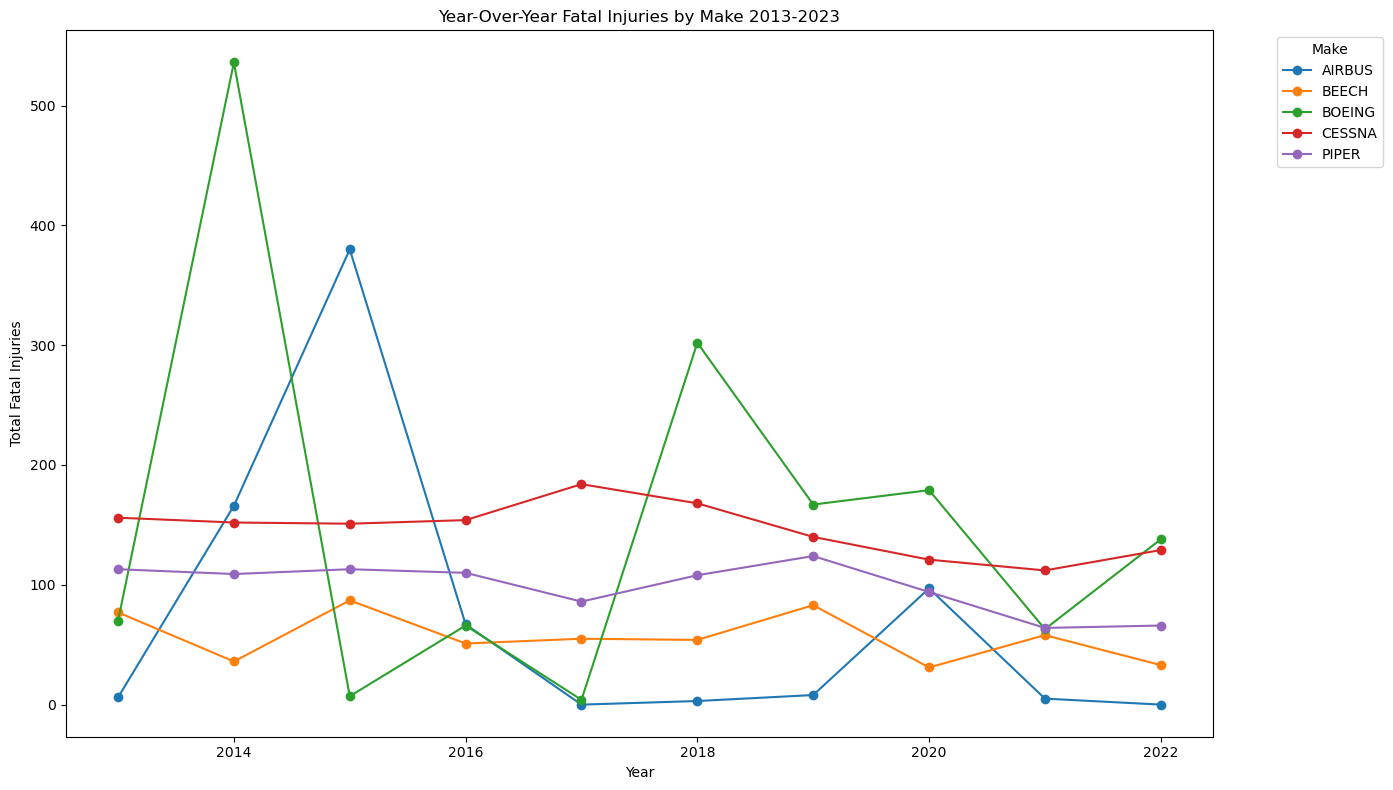

In [455]:
pivot_fatal_injuries.plot(figsize=(14, 8), marker='o', title='Year-Over-Year Fatal Injuries by Make 2013-2023')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

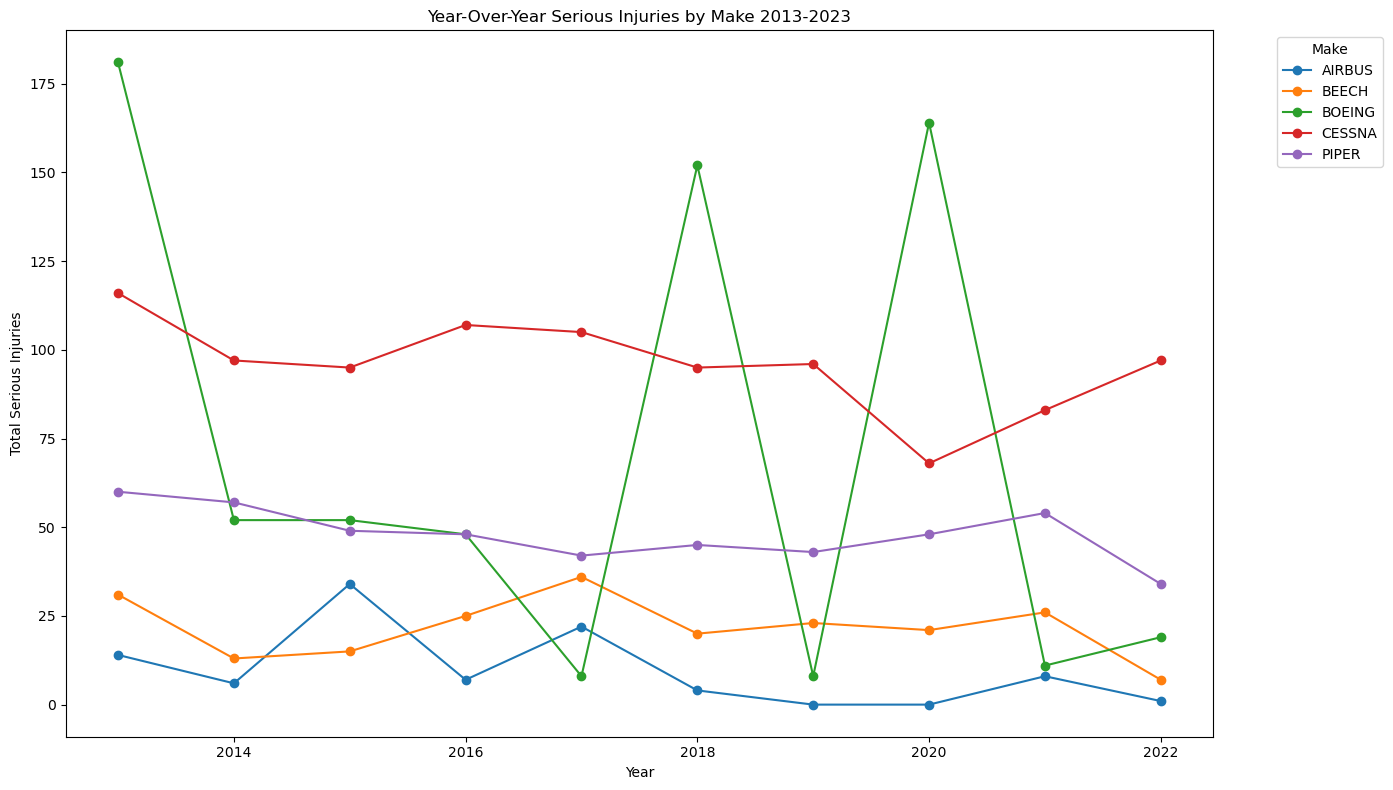

In [456]:
pivot_serious_injuries.plot(figsize=(14, 8), marker='o', title='Year-Over-Year Serious Injuries by Make 2013-2023')
plt.xlabel('Year')
plt.ylabel('Total Serious Injuries')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [457]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_df_makes = filtered_df[filtered_df['Make'].isin(selected_makes)]

Looked at yoy uninjured by make as list index, then pivot index, and then plotted my findings as a line chart

In [458]:
yearly_uninjured_by_make = (
    filtered_df_makes.groupby(['Year', 'Make'])['Total.Uninjured']
    .sum()
    .reset_index()
)

print(yearly_uninjured_by_make.head())

   Year    Make  Total.Uninjured
0  2013  AIRBUS           1167.0
1  2013   BEECH             97.0
2  2013  BOEING           2019.0
3  2013  CESSNA            458.0
4  2013   PIPER            228.0


In [459]:
pivot_uninjured = yearly_uninjured_by_make.pivot(index='Year', columns='Make', values='Total.Uninjured').fillna(0)
print(pivot_uninjured)

Make  AIRBUS  BEECH  BOEING  CESSNA  PIPER
Year                                      
2013  1167.0   97.0  2019.0   458.0  228.0
2014   791.0   50.0  3537.0   374.0  226.0
2015   864.0   93.0  3078.0   423.0  199.0
2016   483.0  134.0  3713.0   506.0  222.0
2017  2174.0   52.0  2484.0   499.0  201.0
2018  1282.0  105.0  2733.0   425.0  252.0
2019   771.0  105.0  2643.0   449.0  271.0
2020   297.0   80.0  1429.0   391.0  227.0
2021   726.0   99.0  1842.0   456.0  231.0
2022   874.0   67.0  1990.0   392.0  246.0


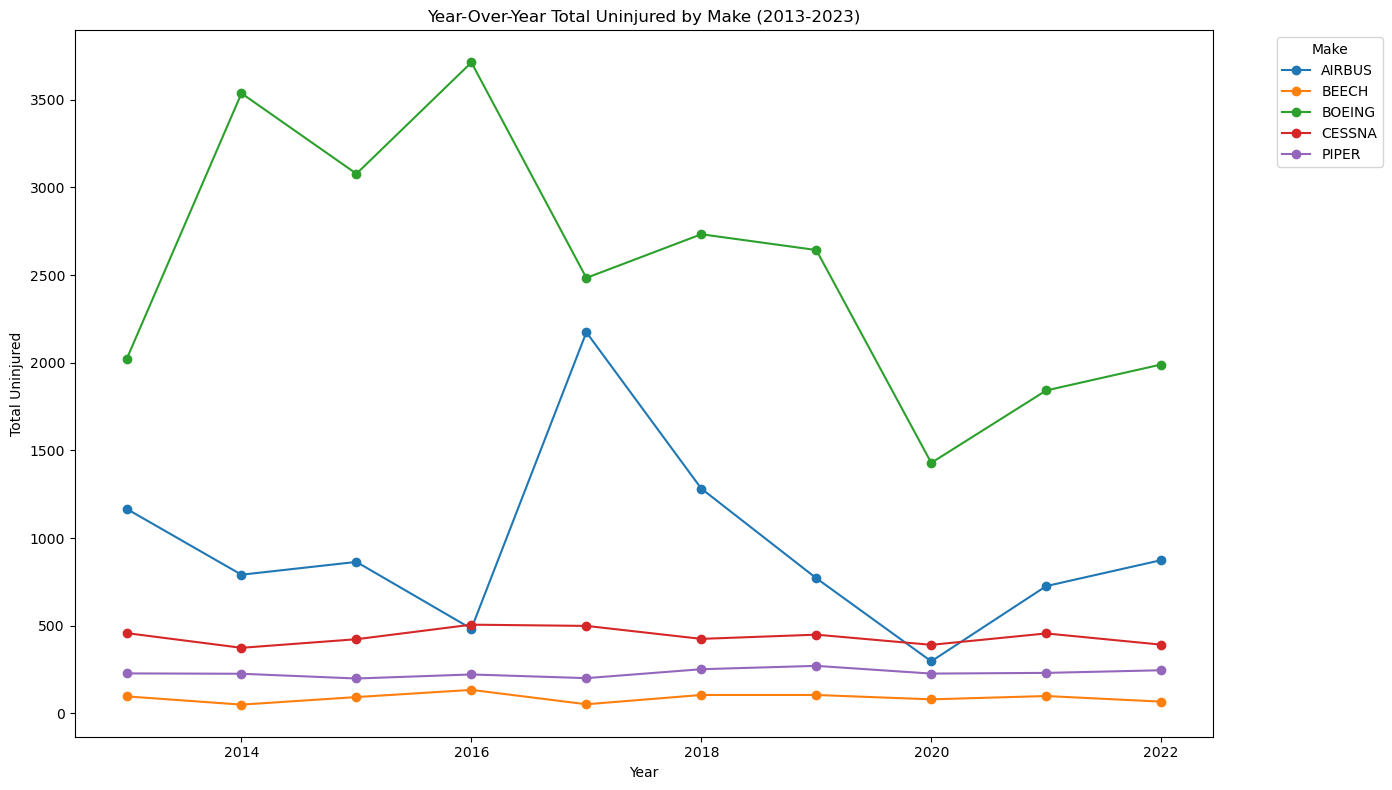

In [460]:
pivot_uninjured.plot(figsize=(14, 8), marker='o', title='Year-Over-Year Total Uninjured by Make (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Total Uninjured')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [507]:
yearly_injured_total_sum = (
    filtered_df.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .sum(axis=1)
    .reset_index(name='total_injured')
)

print(yearly_injured_total_sum)

   Year  total_injured
0  2013         1478.0
1  2014         1879.0
2  2015         1563.0
3  2016         1279.0
4  2017         1065.0
5  2018         1611.0
6  2019         1344.0
7  2020         1261.0
8  2021          905.0
9  2022          993.0


In [508]:
yearly_uninjured = (
    filtered_df.groupby('Year')['Total.Uninjured']
    .sum()
    .reset_index(name='total_uninjured')
)

print(yearly_uninjured)

   Year  total_uninjured
0  2013           5113.0
1  2014           6778.0
2  2015           5964.0
3  2016           6294.0
4  2017           6897.0
5  2018           6417.0
6  2019           5700.0
7  2020           3163.0
8  2021           4238.0
9  2022           4445.0


In [463]:
df.to_csv("jan_23_project_df.csv", index=False)

Concatenated fatal, serious, and uninjured into one subset then looked at the sums of each of the 5 makes yoy against the concatenated columns

In [509]:
combined_injuries_uninjured = pd.concat(
    [
        pivot_fatal_injuries.reset_index().melt(id_vars='Year', var_name='Make', value_name='Fatal.Injuries'),
        pivot_serious_injuries.reset_index().melt(id_vars='Year', var_name='Make', value_name='Serious.Injuries'),
        pivot_uninjured.reset_index().melt(id_vars='Year', var_name='Make', value_name='Uninjured')
    ],
    axis=0
).pivot_table(index=['Year', 'Make'], values=['Fatal.Injuries', 'Serious.Injuries', 'Uninjured'], aggfunc='sum').reset_index()

print(combined_injuries_uninjured)

    Year    Make  Fatal.Injuries  Serious.Injuries  Uninjured
0   2013  AIRBUS             6.0              14.0     1167.0
1   2013   BEECH            77.0              31.0       97.0
2   2013  BOEING            70.0             181.0     2019.0
3   2013  CESSNA           156.0             116.0      458.0
4   2013   PIPER           113.0              60.0      228.0
5   2014  AIRBUS           166.0               6.0      791.0
6   2014   BEECH            36.0              13.0       50.0
7   2014  BOEING           536.0              52.0     3537.0
8   2014  CESSNA           152.0              97.0      374.0
9   2014   PIPER           109.0              57.0      226.0
10  2015  AIRBUS           380.0              34.0      864.0
11  2015   BEECH            87.0              15.0       93.0
12  2015  BOEING             7.0              52.0     3078.0
13  2015  CESSNA           151.0              95.0      423.0
14  2015   PIPER           113.0              49.0      199.0
15  2016

In [565]:
combined_injuries_uninjured['Total.Injured'] = combined_injuries_uninjured['Fatal.Injuries'] + combined_injuries_uninjured['Serious.Injuries']
combined_injuries_uninjured['Total.Sum'] = combined_injuries_uninjured['Total.Injured'] + combined_injuries_uninjured['Uninjured']
combined_injuries_uninjured['Percent.Uninjured'] = (combined_injuries_uninjured['Uninjured'] / combined_injuries_uninjured['Total.Sum']) * 100
combined_injuries_uninjured['Percent.Injured'] = (combined_injuries_uninjured['Total.Injured'] / combined_injuries_uninjured['Total.Sum']) * 100

print(combined_injuries_uninjured.head(50))

    Year    Make  Fatal.Injuries  Serious.Injuries  Uninjured  Total.Injured  \
0   2013  AIRBUS             6.0              14.0     1167.0           20.0   
1   2013   BEECH            77.0              31.0       97.0          108.0   
2   2013  BOEING            70.0             181.0     2019.0          251.0   
3   2013  CESSNA           156.0             116.0      458.0          272.0   
4   2013   PIPER           113.0              60.0      228.0          173.0   
5   2014  AIRBUS           166.0               6.0      791.0          172.0   
6   2014   BEECH            36.0              13.0       50.0           49.0   
7   2014  BOEING           536.0              52.0     3537.0          588.0   
8   2014  CESSNA           152.0              97.0      374.0          249.0   
9   2014   PIPER           109.0              57.0      226.0          166.0   
10  2015  AIRBUS           380.0              34.0      864.0          414.0   
11  2015   BEECH            87.0        

In [566]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

incident_counts = filtered_makes_df.groupby(['Year', 'Make']).size().reset_index(name='incident_count')

print(incident_counts)

    Year    Make  incident_count
0   2013  AIRBUS               7
1   2013   BEECH              81
2   2013  BOEING              23
3   2013  CESSNA             371
4   2013   PIPER             214
5   2014  AIRBUS              11
6   2014   BEECH              53
7   2014  BOEING              36
8   2014  CESSNA             335
9   2014   PIPER             210
10  2015  AIRBUS              20
11  2015   BEECH              84
12  2015  BOEING              27
13  2015  CESSNA             370
14  2015   PIPER             211
15  2016  AIRBUS              11
16  2016   BEECH              83
17  2016  BOEING              40
18  2016  CESSNA             387
19  2016   PIPER             203
20  2017  AIRBUS              15
21  2017   BEECH              70
22  2017  BOEING              28
23  2017  CESSNA             402
24  2017   PIPER             204
25  2018  AIRBUS               9
26  2018   BEECH              91
27  2018  BOEING              26
28  2018  CESSNA             398
29  2018  

Plotted the incident counts yoy by make to show the gap between Airbus, Boeing, and the other three recurring manufactures. I used the fillna() function to ensure that i would not get a blank graph, there were no nans going into this but wanted to be sure.

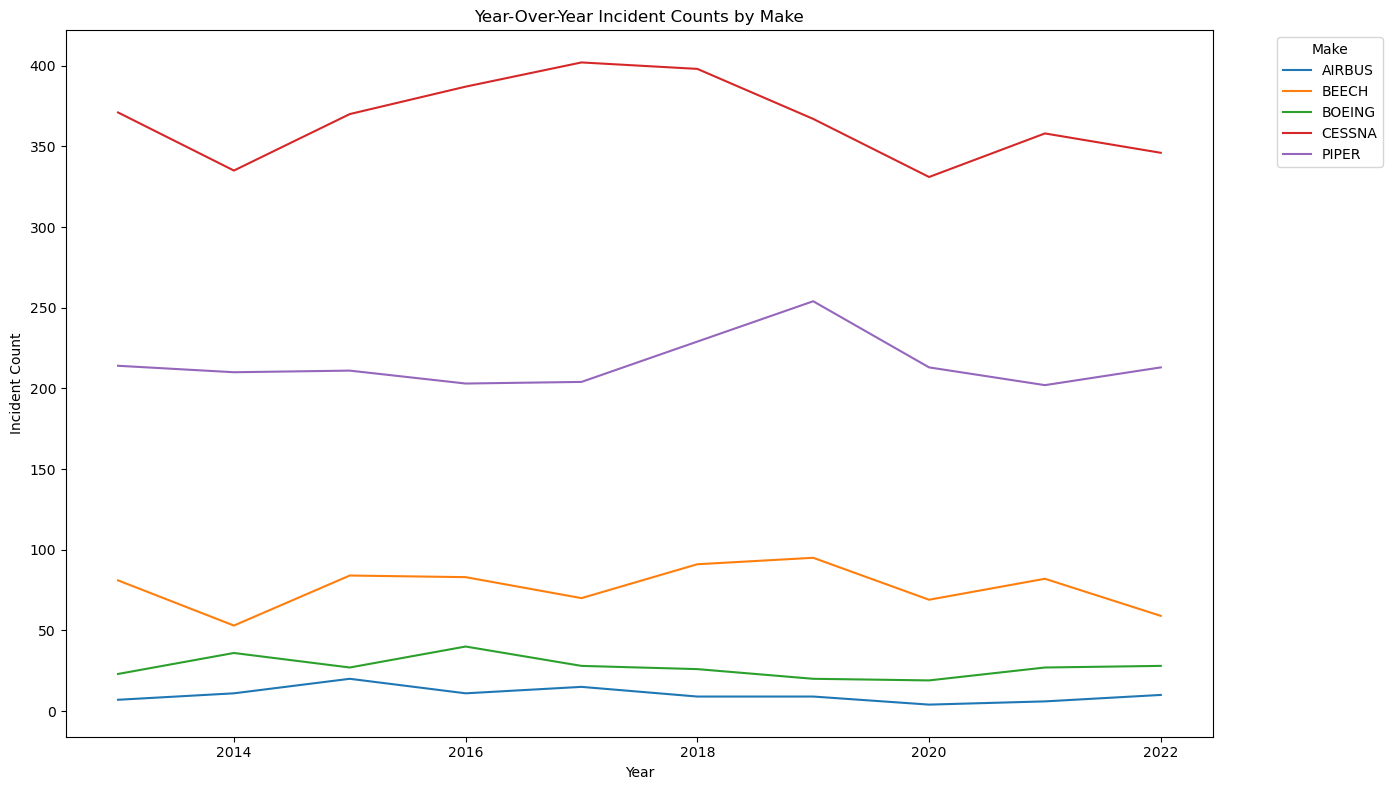

In [568]:
pivot_incident_counts = incident_counts.pivot(index='Year', columns='Make', values='incident_count').fillna(0)

pivot_incident_counts.plot(kind='line', figsize=(14, 8), title='Year-Over-Year Incident Counts by Make')
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [569]:
injuries_by_make = filtered_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()
injuries_by_make['Total.Injured'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']

In [570]:
incident_counts = filtered_df.groupby(['Year', 'Make']).size().reset_index(name='Incident Count')

Summed up the total fatal and serious injuries, and groupby to create a new column (Total Injuries) where the sum total values of fatal and serious injuries would populate. Looked at those values yoy by make. In addition to the sum of total injuries, I included the incident count by make yoy. Then i divided the make incident count by total sum incidents (accounts for all instances yoy across all 5 makes) to calculate the likelihood of an injury in the even of an incident by make and year 

In [571]:
injuries_by_make = filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()
injuries_by_make['Total Injuries'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']

incident_counts = filtered_makes_df.groupby(['Year', 'Make']).size().reset_index(name='Make Incident Count')

total_incidents = filtered_makes_df.groupby('Year').size().reset_index(name='Total Incidents')

combined = pd.merge(injuries_by_make.reset_index(), incident_counts, on=['Year', 'Make'])
combined = pd.merge(combined, total_incidents, on='Year')
combined['Likelihood of Incident (%)'] = (combined['Make Incident Count'] / combined['Total Incidents']) * 100

output = combined[[
    'Year', 'Make', 'Total Injuries', 'Make Incident Count', 'Total Incidents', 'Likelihood of Incident (%)'
]].sort_values(by=['Year', 'Make'])

print(output)

    Year    Make  Total Injuries  Make Incident Count  Total Incidents  \
0   2013  AIRBUS            20.0                    7              696   
1   2013   BEECH           108.0                   81              696   
2   2013  BOEING           251.0                   23              696   
3   2013  CESSNA           272.0                  371              696   
4   2013   PIPER           173.0                  214              696   
5   2014  AIRBUS           172.0                   11              645   
6   2014   BEECH            49.0                   53              645   
7   2014  BOEING           588.0                   36              645   
8   2014  CESSNA           249.0                  335              645   
9   2014   PIPER           166.0                  210              645   
10  2015  AIRBUS           414.0                   20              712   
11  2015   BEECH           102.0                   84              712   
12  2015  BOEING            59.0      

did double work on the syntax below, it outputs the likelihood of an incident minus the injury output.

In [477]:
make_output_col = output[['Make', 'Year', 'Total Incidents', 'Likelihood of Incident (%)']]
make_comp_output_year = make_output_col.sort_values(by= 'Year')
make_comp_output = make_comp_output_year.groupby(['Year', 'Make']).sum().reset_index()

print(make_comp_output)

    Year    Make  Total Incidents  Likelihood of Incident (%)
0   2013  AIRBUS              696                    1.005747
1   2013   BEECH              696                   11.637931
2   2013  BOEING              696                    3.304598
3   2013  CESSNA              696                   53.304598
4   2013   PIPER              696                   30.747126
5   2014  AIRBUS              645                    1.705426
6   2014   BEECH              645                    8.217054
7   2014  BOEING              645                    5.581395
8   2014  CESSNA              645                   51.937984
9   2014   PIPER              645                   32.558140
10  2015  AIRBUS              712                    2.808989
11  2015   BEECH              712                   11.797753
12  2015  BOEING              712                    3.792135
13  2015  CESSNA              712                   51.966292
14  2015   PIPER              712                   29.634831
15  2016

Follow graphs plot make incident count yoy and likelihood of incident yoy by make

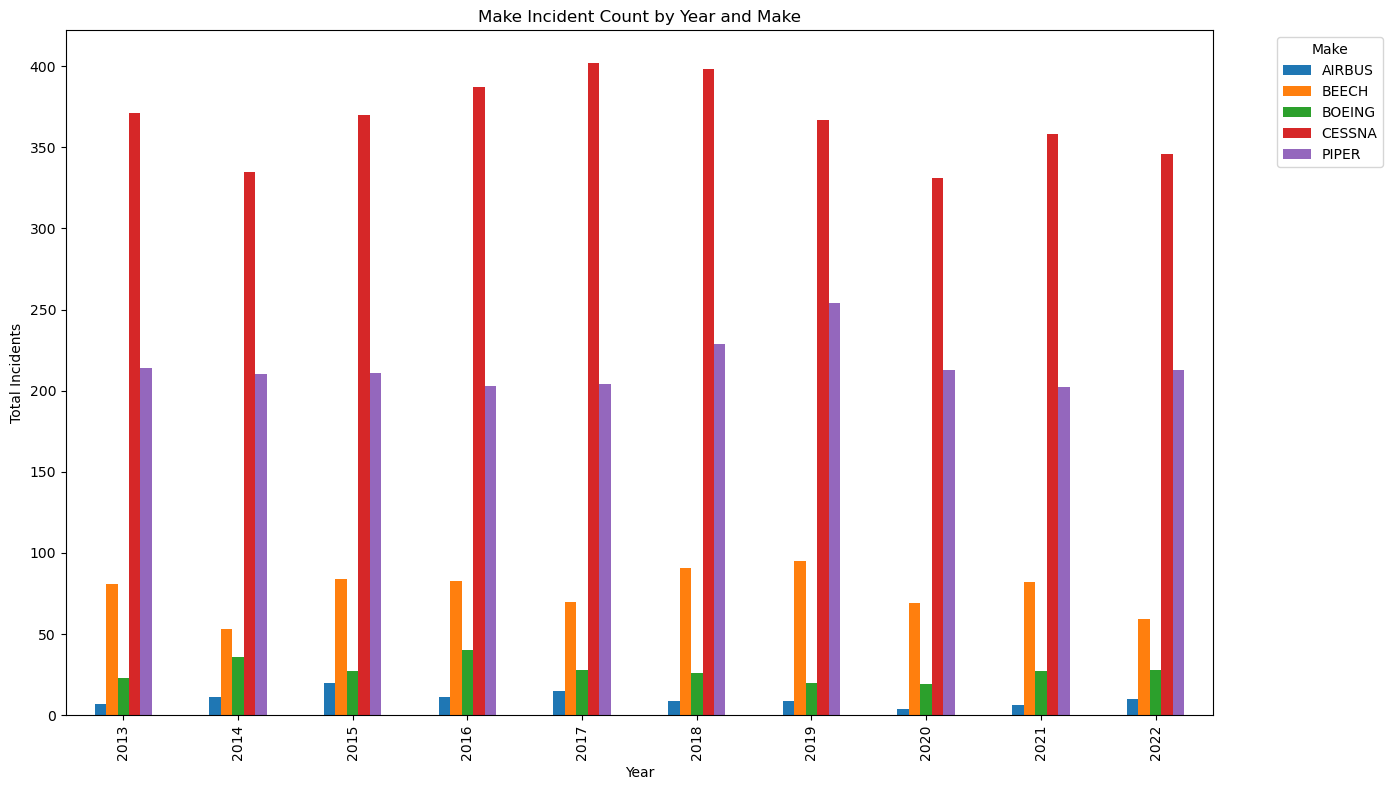

In [572]:
pivoted_data = output.pivot(index='Year', columns='Make', values='Make Incident Count')

pivoted_data.plot(
    kind='bar',
    figsize=(14, 8),
    title='Make Incident Count by Year and Make',
    xlabel='Year',
    ylabel='Total Incidents',
    legend=True
)

plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

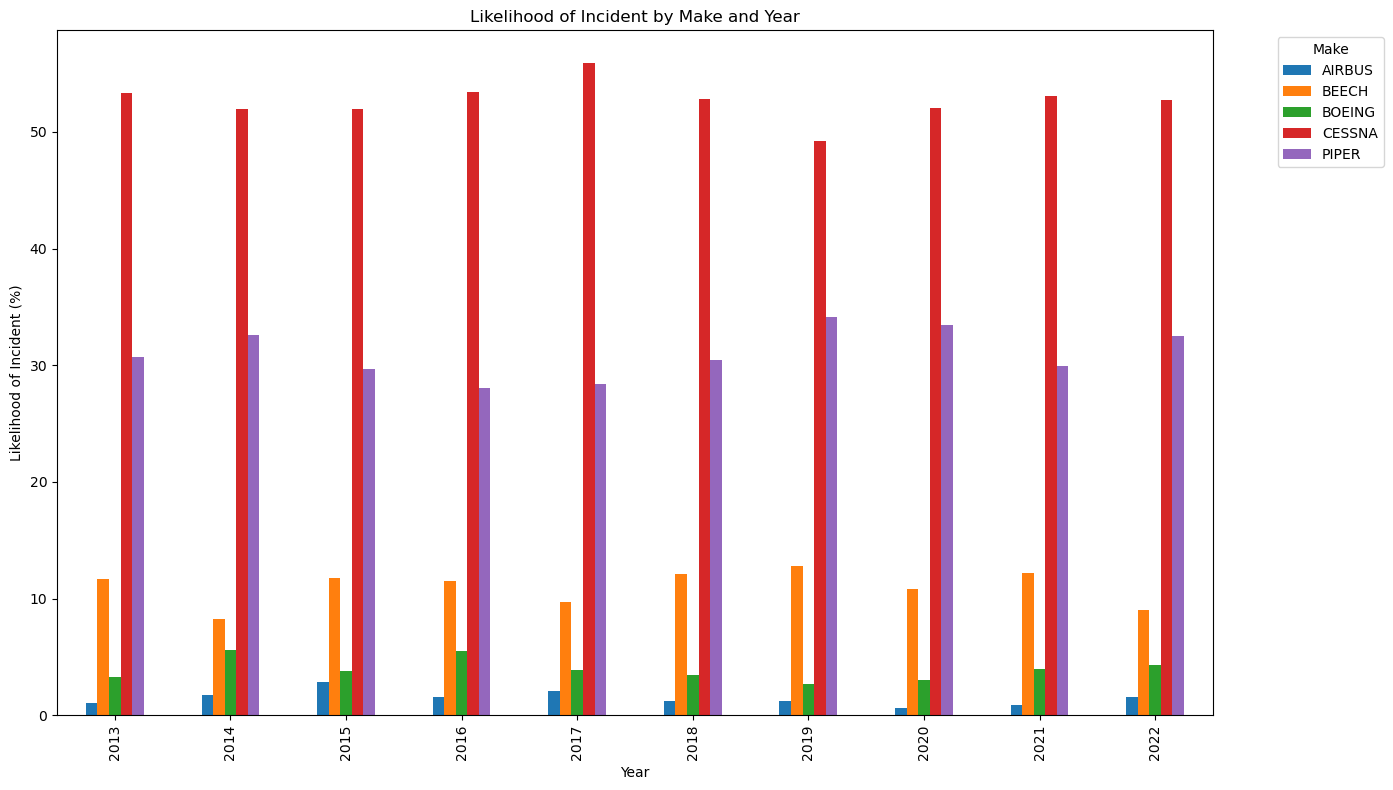

In [573]:
pivoted_likelihood = make_comp_output.pivot(index='Year', columns='Make', values='Likelihood of Incident (%)')

pivoted_likelihood.plot(
    kind='bar',
    figsize=(14, 8),
    title='Likelihood of Incident by Make and Year',
    xlabel='Year',
    ylabel='Likelihood of Incident (%)',
    legend=True
)

plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [574]:
clean_table = make_comp_output[['Year', 'Make', 'Likelihood of Incident (%)']]
print(clean_table)

    Year    Make  Likelihood of Incident (%)
0   2013  AIRBUS                    1.005747
1   2013   BEECH                   11.637931
2   2013  BOEING                    3.304598
3   2013  CESSNA                   53.304598
4   2013   PIPER                   30.747126
5   2014  AIRBUS                    1.705426
6   2014   BEECH                    8.217054
7   2014  BOEING                    5.581395
8   2014  CESSNA                   51.937984
9   2014   PIPER                   32.558140
10  2015  AIRBUS                    2.808989
11  2015   BEECH                   11.797753
12  2015  BOEING                    3.792135
13  2015  CESSNA                   51.966292
14  2015   PIPER                   29.634831
15  2016  AIRBUS                    1.519337
16  2016   BEECH                   11.464088
17  2016  BOEING                    5.524862
18  2016  CESSNA                   53.453039
19  2016   PIPER                   28.038674
20  2017  AIRBUS                    2.086231
21  2017  

Looking specifically at Airbus and Boeing likelihood of incident yoy

In [575]:
filtered_table = clean_table[clean_table['Make'].isin(['BOEING', 'AIRBUS'])]
filtered_table = filtered_table.sort_values(by=['Make', 'Year'])

print(filtered_table)

    Year    Make  Likelihood of Incident (%)
0   2013  AIRBUS                    1.005747
5   2014  AIRBUS                    1.705426
10  2015  AIRBUS                    2.808989
15  2016  AIRBUS                    1.519337
20  2017  AIRBUS                    2.086231
25  2018  AIRBUS                    1.195219
30  2019  AIRBUS                    1.208054
35  2020  AIRBUS                    0.628931
40  2021  AIRBUS                    0.888889
45  2022  AIRBUS                    1.524390
2   2013  BOEING                    3.304598
7   2014  BOEING                    5.581395
12  2015  BOEING                    3.792135
17  2016  BOEING                    5.524862
22  2017  BOEING                    3.894298
27  2018  BOEING                    3.452855
32  2019  BOEING                    2.684564
37  2020  BOEING                    2.987421
42  2021  BOEING                    4.000000
47  2022  BOEING                    4.268293


In [576]:
filtered_table = clean_table[clean_table['Make'].isin(['BEECH', 'CESSNA', 'PIPER'])]
filtered_table = filtered_table.sort_values(by=['Make', 'Year'])

print(filtered_table)

    Year    Make  Likelihood of Incident (%)
1   2013   BEECH                   11.637931
6   2014   BEECH                    8.217054
11  2015   BEECH                   11.797753
16  2016   BEECH                   11.464088
21  2017   BEECH                    9.735744
26  2018   BEECH                   12.084993
31  2019   BEECH                   12.751678
36  2020   BEECH                   10.849057
41  2021   BEECH                   12.148148
46  2022   BEECH                    8.993902
3   2013  CESSNA                   53.304598
8   2014  CESSNA                   51.937984
13  2015  CESSNA                   51.966292
18  2016  CESSNA                   53.453039
23  2017  CESSNA                   55.910987
28  2018  CESSNA                   52.855246
33  2019  CESSNA                   49.261745
38  2020  CESSNA                   52.044025
43  2021  CESSNA                   53.037037
48  2022  CESSNA                   52.743902
4   2013   PIPER                   30.747126
9   2014  

In [483]:
average_likelihood = clean_table.groupby('Make')['Likelihood of Incident (%)'].mean().reset_index()
print(average_likelihood)

     Make  Likelihood of Incident (%)
0  AIRBUS                    1.457121
1   BEECH                   10.968035
2  BOEING                    3.949042
3  CESSNA                   52.651486
4   PIPER                   30.974316


Used seaborn barplot to visualize likelihood of incident yoy among most recurring manufactures. The pallet color i 100% googled lol

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_8224/766817878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


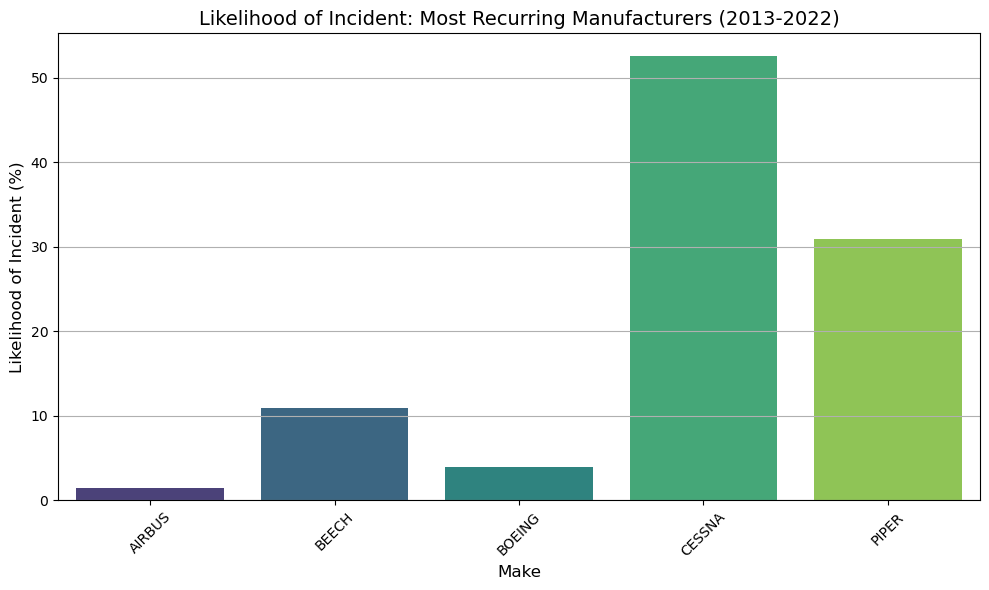

In [514]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=average_likelihood,
    x='Make',
    y='Likelihood of Incident (%)',
    palette='viridis'  # Nice color palette
)

plt.title('Likelihood of Incident: Most Recurring Manufacturers (2013-2022)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Likelihood of Incident (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [516]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

injuries_by_make = filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()
injuries_by_make['Total Injuries'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']

total_injuries_by_year = injuries_by_make.groupby('Year')['Total Injuries'].sum().reset_index(name='Total Injuries All Makes')

injuries_with_totals = injuries_by_make.reset_index()
injuries_with_totals = pd.merge(injuries_with_totals, total_injuries_by_year, on='Year')

injuries_with_totals['Likelihood of Injuries (%)'] = (
    (injuries_with_totals['Total Injuries'] / injuries_with_totals['Total Injuries All Makes']) * 100
)

output_injuries = injuries_with_totals[[
    'Year', 'Make', 'Total Injuries', 'Total Injuries All Makes', 'Likelihood of Injuries (%)'
]].sort_values(by=['Year', 'Make'])

print(output_injuries)

    Year    Make  Total Injuries  Total Injuries All Makes  \
0   2013  AIRBUS            20.0                     824.0   
1   2013   BEECH           108.0                     824.0   
2   2013  BOEING           251.0                     824.0   
3   2013  CESSNA           272.0                     824.0   
4   2013   PIPER           173.0                     824.0   
5   2014  AIRBUS           172.0                    1224.0   
6   2014   BEECH            49.0                    1224.0   
7   2014  BOEING           588.0                    1224.0   
8   2014  CESSNA           249.0                    1224.0   
9   2014   PIPER           166.0                    1224.0   
10  2015  AIRBUS           414.0                     983.0   
11  2015   BEECH           102.0                     983.0   
12  2015  BOEING            59.0                     983.0   
13  2015  CESSNA           246.0                     983.0   
14  2015   PIPER           162.0                     983.0   
15  2016

In [577]:
average_inj_likelihood = output_injuries.groupby('Make')['Likelihood of Injuries (%)'].mean().reset_index()
print(average_inj_likelihood)

     Make  Likelihood of Injuries (%)
0  AIRBUS                    9.004411
1   BEECH                   10.981002
2  BOEING                   26.336363
3  CESSNA                   33.805601
4   PIPER                   19.872623


Followed same steps that i used to show likelihood of an incident yoy for most recurring manufactures 

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_8224/1374439051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


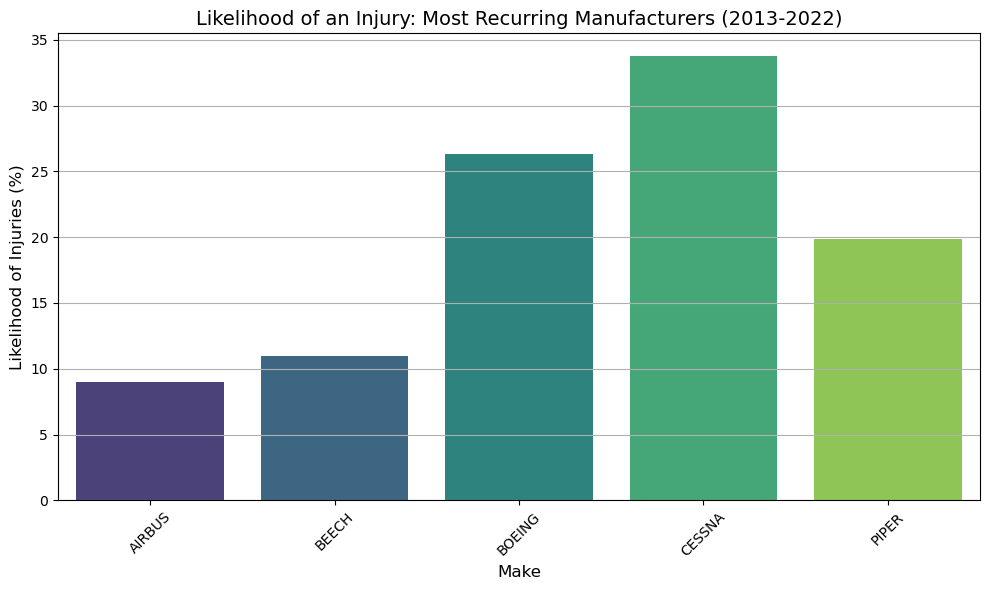

In [578]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=average_inj_likelihood,
    x='Make',
    y='Likelihood of Injuries (%)',
    palette='viridis'
)

plt.title('Likelihood of an Injury: Most Recurring Manufacturers (2013-2022)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Likelihood of Injuries (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Followed same formula that I used for getting the likelihood of an incident by make yoy to get likelihood of an injury yoy by make

In [519]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

injuries_by_make = filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()
injuries_by_make['Total Injuries'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']

total_injuries_by_year = injuries_by_make.groupby('Year')['Total Injuries'].sum().reset_index(name='Total Injuries All Makes')

injuries_with_totals = injuries_by_make.reset_index()
injuries_with_totals = pd.merge(injuries_with_totals, total_injuries_by_year, on='Year')

injuries_with_totals['Likelihood of Injuries (%)'] = (
    (injuries_with_totals['Total Injuries'] / injuries_with_totals['Total Injuries All Makes']) * 100
)

safety_rates = injuries_with_totals[[
    'Year', 'Make', 'Total Injuries', 'Total Injuries All Makes', 'Likelihood of Injuries (%)'
]].sort_values(by=['Year', 'Make'])

print(safety_rates)

    Year    Make  Total Injuries  Total Injuries All Makes  \
0   2013  AIRBUS            20.0                     824.0   
1   2013   BEECH           108.0                     824.0   
2   2013  BOEING           251.0                     824.0   
3   2013  CESSNA           272.0                     824.0   
4   2013   PIPER           173.0                     824.0   
5   2014  AIRBUS           172.0                    1224.0   
6   2014   BEECH            49.0                    1224.0   
7   2014  BOEING           588.0                    1224.0   
8   2014  CESSNA           249.0                    1224.0   
9   2014   PIPER           166.0                    1224.0   
10  2015  AIRBUS           414.0                     983.0   
11  2015   BEECH           102.0                     983.0   
12  2015  BOEING            59.0                     983.0   
13  2015  CESSNA           246.0                     983.0   
14  2015   PIPER           162.0                     983.0   
15  2016

To get the safety rating by make yoy i added the sum total of uninjured yoy. I groupby fatal and serious injuries, and total uninjured to get the total individuals. I divided total.uninjured by total individuals to get the safety rating percentage

In [579]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

injuries_by_make = filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured']].sum()
injuries_by_make['Total Injured'] = injuries_by_make['Total.Fatal.Injuries'] + injuries_by_make['Total.Serious.Injuries']
injuries_by_make['Total Individuals'] = injuries_by_make['Total Injured'] + injuries_by_make['Total.Uninjured']
injuries_by_make['Safety Rate (%)'] = (injuries_by_make['Total.Uninjured'] / injuries_by_make['Total Individuals']) * 100

safety_output = injuries_by_make.reset_index()[[
    'Year', 'Make', 'Total.Uninjured', 'Total Individuals', 'Safety Rate (%)'
]].sort_values(by=['Year', 'Make'])

print(safety_output)

    Year    Make  Total.Uninjured  Total Individuals  Safety Rate (%)
0   2013  AIRBUS           1167.0             1187.0        98.315080
1   2013   BEECH             97.0              205.0        47.317073
2   2013  BOEING           2019.0             2270.0        88.942731
3   2013  CESSNA            458.0              730.0        62.739726
4   2013   PIPER            228.0              401.0        56.857855
5   2014  AIRBUS            791.0              963.0        82.139148
6   2014   BEECH             50.0               99.0        50.505051
7   2014  BOEING           3537.0             4125.0        85.745455
8   2014  CESSNA            374.0              623.0        60.032103
9   2014   PIPER            226.0              392.0        57.653061
10  2015  AIRBUS            864.0             1278.0        67.605634
11  2015   BEECH             93.0              195.0        47.692308
12  2015  BOEING           3078.0             3137.0        98.119222
13  2015  CESSNA    

In [521]:
safety_output_likelihood = safety_output.groupby('Make')['Safety Rate (%)'].mean().reset_index()
print(safety_output_likelihood)

     Make  Safety Rate (%)
0  AIRBUS        90.570986
1   BEECH        53.143109
2  BOEING        91.836095
3  CESSNA        64.350772
4   PIPER        61.205021


Used a seaborn barplot to visualize the safey rating yoy by make. Again had to google for a cool color pallete, and admittedly to make the plot horizontal.

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_8224/2571252709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


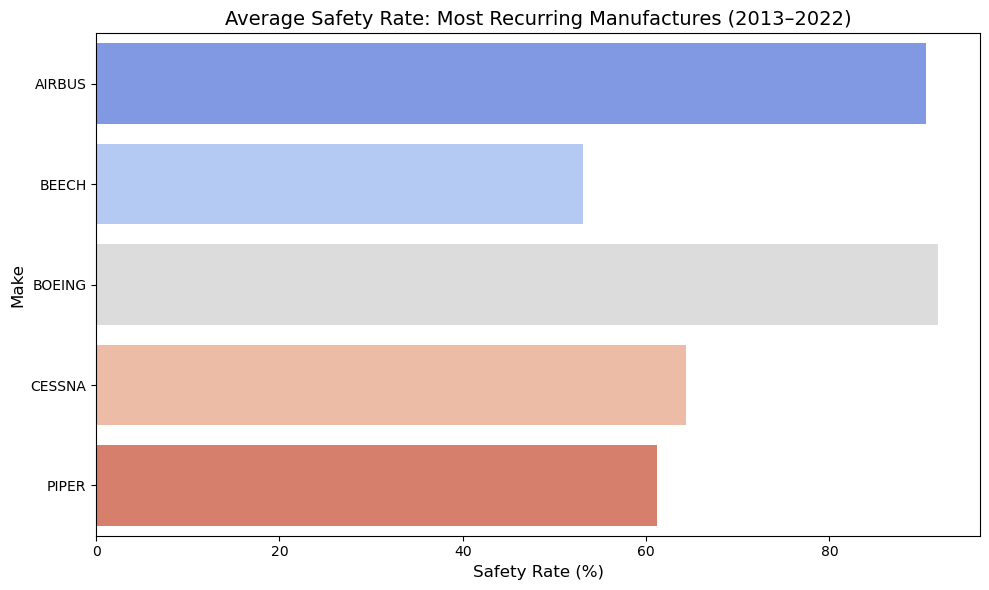

In [522]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=safety_output_likelihood,
    x='Safety Rate (%)',
    y='Make',
    palette='coolwarm'  # Choose a visually appealing color palette
)

plt.title('Average Safety Rate: Most Recurring Manufactures (2013–2022)', fontsize=14)
plt.xlabel('Safety Rate (%)', fontsize=12)
plt.ylabel('Make', fontsize=12)

plt.tight_layout()
plt.show()


In [582]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

yearly_injured_total_sum = (
    filtered_makes_df.groupby(['Year', 'Make'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .sum(axis=1)
    .reset_index(name='total_injured')
)

print(yearly_injured_total_sum)

    Year    Make  total_injured
0   2013  AIRBUS           20.0
1   2013   BEECH          108.0
2   2013  BOEING          251.0
3   2013  CESSNA          272.0
4   2013   PIPER          173.0
5   2014  AIRBUS          172.0
6   2014   BEECH           49.0
7   2014  BOEING          588.0
8   2014  CESSNA          249.0
9   2014   PIPER          166.0
10  2015  AIRBUS          414.0
11  2015   BEECH          102.0
12  2015  BOEING           59.0
13  2015  CESSNA          246.0
14  2015   PIPER          162.0
15  2016  AIRBUS           74.0
16  2016   BEECH           76.0
17  2016  BOEING          114.0
18  2016  CESSNA          261.0
19  2016   PIPER          158.0
20  2017  AIRBUS           22.0
21  2017   BEECH           91.0
22  2017  BOEING           12.0
23  2017  CESSNA          289.0
24  2017   PIPER          128.0
25  2018  AIRBUS            7.0
26  2018   BEECH           74.0
27  2018  BOEING          454.0
28  2018  CESSNA          263.0
29  2018   PIPER          153.0
30  2019

In [583]:
yearly_injury_likelihood = yearly_injured_total_sum.groupby('Make')['Safety Rate (%)'].mean().reset_index()
print(yearly_injury_likelihood)

KeyError: 'Column not found: Safety Rate (%)'

In [585]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

total_uninjured_by_make = (
    filtered_makes_df.groupby('Make')['Total.Uninjured']
    .sum()
    .reset_index(name='total_uninjured')
)

print(total_uninjured_by_make)

     Make  total_uninjured
0  AIRBUS           9429.0
1   BEECH            882.0
2  BOEING          25468.0
3  CESSNA           4373.0
4   PIPER           2303.0


As I've been getting rid of charts that we did not use for our presentation, i've been running into error messages

In [588]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_injuries_by_make,
    x='Make',
    y='avg_annual_injuries',
    palette='viridis'
)

plt.title('Average Annual Injuries by Most Recurring Manufactures (2013–2022)', fontsize=14)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Average Annual Injuries', fontsize=12)

plt.tight_layout()
plt.show()


NameError: name 'total_injuries_by_make' is not defined

<Figure size 1000x600 with 0 Axes>

In [532]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
model_unique = filtered_df['Model'].nunique()
model_unique

3709

In [589]:
selected_makes = ['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH']
filtered_makes_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

filtered_makes_df['Model'] = filtered_makes_df['Model'].str.upper().str.strip()

model_replacements = {
    'A-320': 'A320',
    'AIRBUS A320': 'A320',
    'A321 NEO': 'A321',
    'AIRBUS 330': 'A330',
    'B737-800': '737-800',
    'BOEING 737': '737',
    'B777': '777',
    'BOEING 787-8': '787-8',
    'CESSNA172': 'CESSNA 172',
    'C172': 'CESSNA 172',
    'C182': 'CESSNA 182',
    'CESSNA-182': 'CESSNA 182',
    'PIPER CHEROKEE': 'CHEROKEE',
    'PIPER PA-28': 'PA-28',
    'PA28': 'PA-28',

    'BEECHCRAFT KING AIR': 'KING AIR',
    'BEECH 1900D': '1900D',
    'KINGAIR': 'KING AIR',
    'BEECH 58': '58'
}

filtered_makes_df['Model'] = filtered_makes_df['Model'].replace(model_replacements)
print(filtered_makes_df['Model'].nunique())

854


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_8224/4254743819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_makes_df['Model'] = filtered_makes_df['Model'].str.upper().str.strip()
/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_8224/4254743819.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_makes_df['Model'] = filtered_makes_df['Model'].replace(model_replacements)


In [534]:
model_counts = filtered_makes_df['Model'].value_counts()
models_to_keep = model_counts[model_counts > 2].index
filtered_makes_df = filtered_makes_df[filtered_makes_df['Model'].isin(models_to_keep)]

print(f"Remaining unique models: {filtered_makes_df['Model'].nunique()}")
print(filtered_makes_df['Model'].value_counts().head(50))

Remaining unique models: 407
Model
172          597
PA-28        254
182          218
152          144
150          130
180          124
A36           89
172N          82
172S          82
PA18          79
140           74
737           71
172M          69
A185          65
PA-28-140     63
170           61
PA28R         57
210           57
PA 18-150     57
PA32          54
170B          49
208           48
PA22          46
177           44
PA46          44
172P          43
35            42
58            41
208B          40
PA34          39
PA-18-150     39
T210          39
U206          38
PA 12         37
A185F         37
120           35
PA24          34
172R          34
PA32R         33
PA25          31
PA 28-140     30
PA 28-180     30
R182          29
177RG         28
P210N         28
182Q          28
J3C           28
PA 18         27
PA-28-161     27
36            26
Name: count, dtype: int64


In [590]:
make_model_counts = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .size()
    .reset_index(name='Count')
)

significant_models = make_model_counts[make_model_counts['Count'] > 2]

filtered_makes_df = pd.merge(
    filtered_makes_df,
    significant_models[['Make', 'Model']],
    on=['Make', 'Model']
)

print(f"Remaining unique Make-Model combinations: {filtered_makes_df[['Make', 'Model']].drop_duplicates().shape[0]}")
print(filtered_makes_df[['Make', 'Model']].value_counts().head(50))

Remaining unique Make-Model combinations: 406
Make    Model    
CESSNA  172          597
PIPER   PA-28        254
CESSNA  182          218
        152          144
        150          130
        180          124
BEECH   A36           89
CESSNA  172N          82
        172S          82
PIPER   PA18          79
CESSNA  140           74
BOEING  737           71
CESSNA  172M          69
        A185          65
PIPER   PA-28-140     63
CESSNA  170           61
        210           57
PIPER   PA28R         57
        PA 18-150     57
        PA32          54
CESSNA  170B          49
        208           48
PIPER   PA22          46
        PA46          44
CESSNA  177           44
        172P          43
BEECH   35            42
        58            41
CESSNA  208B          40
PIPER   PA-18-150     39
        PA34          39
CESSNA  T210          39
        U206          38
        A185F         37
PIPER   PA 12         37
CESSNA  120           35
        172R          34
PIPER   PA2

In [591]:
make_model_stats = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .agg({
        'Total.Uninjured': 'sum',
        'Total.Fatal.Injuries': 'sum',
        'Total.Serious.Injuries': 'sum'
    })
    .reset_index()
)

make_model_stats['Total Individuals'] = (
    make_model_stats['Total.Uninjured'] +
    make_model_stats['Total.Fatal.Injuries'] +
    make_model_stats['Total.Serious.Injuries']
)
make_model_stats['Uninjured Percentage'] = (
    (make_model_stats['Total.Uninjured'] / make_model_stats['Total Individuals']) * 100
)

make_model_counts = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .size()
    .reset_index(name='Count')
)
make_model_stats = pd.merge(make_model_stats, make_model_counts, on=['Make', 'Model'])

top_100_make_models = make_model_stats.sort_values(by='Count', ascending=False).head(100)

top_100_sorted = top_100_make_models.sort_values(by='Uninjured Percentage', ascending=False)
print(top_100_sorted[['Make', 'Model', 'Count', 'Uninjured Percentage']])

       Make       Model  Count  Uninjured Percentage
272   PIPER       PA 12     37             91.071429
293   PIPER       PA 28     23             89.473684
325   PIPER  PA 46-350P     16             88.571429
333   PIPER   PA-18-150     39             87.931034
173  CESSNA         195     18             87.878788
..      ...         ...    ...                   ...
57    BEECH         C90     20             40.384615
397   PIPER        PA34     39             36.956522
224  CESSNA        A188     19             30.000000
78    BEECH         V35     20             18.918919
387   PIPER        PA25     31             16.129032

[100 rows x 4 columns]


In [592]:
make_model_stats = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .agg({
        'Total.Uninjured': 'sum',
        'Total.Fatal.Injuries': 'sum',
        'Total.Serious.Injuries': 'sum'
    })
    .reset_index()
)

make_model_stats['Total Individuals'] = (
    make_model_stats['Total.Uninjured'] +
    make_model_stats['Total.Fatal.Injuries'] +
    make_model_stats['Total.Serious.Injuries']
)
make_model_stats['Uninjured Percentage'] = (
    (make_model_stats['Total.Uninjured'] / make_model_stats['Total Individuals']) * 100
)

make_model_counts = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .size()
    .reset_index(name='Count')
)
make_model_stats = pd.merge(make_model_stats, make_model_counts, on=['Make', 'Model'])

top_100_make_models = make_model_stats.sort_values(by='Count', ascending=False).head(100)
top_100_sorted = top_100_make_models.sort_values(by='Uninjured Percentage', ascending=False)
print(top_100_sorted[['Make', 'Model', 'Count', 'Total Individuals', 'Uninjured Percentage']])

       Make       Model  Count  Total Individuals  Uninjured Percentage
272   PIPER       PA 12     37               56.0             91.071429
293   PIPER       PA 28     23               38.0             89.473684
325   PIPER  PA 46-350P     16               35.0             88.571429
333   PIPER   PA-18-150     39               58.0             87.931034
173  CESSNA         195     18               33.0             87.878788
..      ...         ...    ...                ...                   ...
57    BEECH         C90     20               52.0             40.384615
397   PIPER        PA34     39               92.0             36.956522
224  CESSNA        A188     19               20.0             30.000000
78    BEECH         V35     20               37.0             18.918919
387   PIPER        PA25     31               31.0             16.129032

[100 rows x 5 columns]


In [593]:
filtered_makes_df['Total Individuals'] = (
    filtered_makes_df['Total.Uninjured'] +
    filtered_makes_df['Total.Fatal.Injuries'] +
    filtered_makes_df['Total.Serious.Injuries']
)

filtered_makes_df = filtered_makes_df[filtered_makes_df['Total Individuals'] >= 10]
print(f"Remaining rows after filtering: {filtered_makes_df.shape[0]}")
print(filtered_makes_df['Model'].value_counts())

Remaining rows after filtering: 184
Model
737          61
737 7H4      11
767           9
208           8
A320          8
757           8
777           7
208B          6
A321          6
737-8H4       5
A321 231      5
777 223       4
A330          4
A319          4
A330 323      3
A320-232      3
737 3H4       3
787           3
737-824       3
767 322       3
737-700       3
PA-31-350     2
A319 115      2
737-800       2
B200          1
560XL         1
560           1
550           1
E 90          1
PA 31P        1
1900C         1
1900          1
200           1
182L          1
441           1
Name: count, dtype: int64


In [594]:
model_counts = filtered_makes_df['Model'].value_counts()
models_to_keep = model_counts[model_counts > 4].index

filtered_makes_df = filtered_makes_df[filtered_makes_df['Model'].isin(models_to_keep)]
print(f"Remaining rows after removing models with only one instance: {filtered_makes_df.shape[0]}")
print(filtered_makes_df['Model'].value_counts())

Remaining rows after removing models with only one instance: 134
Model
737         61
737 7H4     11
767          9
208          8
A320         8
757          8
777          7
208B         6
A321         6
A321 231     5
737-8H4      5
Name: count, dtype: int64


In [ ]:
df.to_csv("jan_24_project_df.csv", index=False)

In [595]:
model_counts = filtered_makes_df['Model'].value_counts()
models_to_keep = model_counts[model_counts > 4].index

filtered_makes_df = filtered_makes_df[filtered_makes_df['Model'].isin(models_to_keep)]

model_safety_stats = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .agg({
        'Total.Uninjured': 'sum',
        'Total.Fatal.Injuries': 'sum',
        'Total.Serious.Injuries': 'sum'
    })
    .reset_index()
)

model_safety_stats['Total Individuals'] = (
    model_safety_stats['Total.Uninjured'] +
    model_safety_stats['Total.Fatal.Injuries'] +
    model_safety_stats['Total.Serious.Injuries']
)
model_safety_stats['Safety Rating (%)'] = (
    (model_safety_stats['Total.Uninjured'] / model_safety_stats['Total Individuals']) * 100
)

print(model_safety_stats[['Make', 'Model', 'Total Individuals', 'Safety Rating (%)']])

      Make     Model  Total Individuals  Safety Rating (%)
0   AIRBUS      A320             1146.0          85.776614
1   AIRBUS      A321             1109.0          79.801623
2   AIRBUS  A321 231              843.0          99.881376
3   BOEING       737             8192.0          85.986328
4   BOEING   737 7H4             1489.0          91.000672
5   BOEING   737-8H4              767.0          99.869622
6   BOEING       757             1428.0         100.000000
7   BOEING       767             1563.0          96.928983
8   BOEING       777             1640.0          99.756098
9   CESSNA       208               94.0          63.829787
10  CESSNA      208B               78.0          80.769231


In [596]:
model_counts = filtered_makes_df['Model'].value_counts()
models_to_keep = model_counts[model_counts > 4].index
filtered_makes_df = filtered_makes_df[filtered_makes_df['Model'].isin(models_to_keep)]

model_safety_stats = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .agg({
        'Total.Uninjured': 'sum',
        'Total.Fatal.Injuries': 'sum',
        'Total.Serious.Injuries': 'sum'
    })
    .reset_index()
)

model_safety_stats['Total Individuals'] = (
    model_safety_stats['Total.Uninjured'] +
    model_safety_stats['Total.Fatal.Injuries'] +
    model_safety_stats['Total.Serious.Injuries']
)
model_safety_stats['Safety Rating (%)'] = (
    (model_safety_stats['Total.Uninjured'] / model_safety_stats['Total Individuals']) * 100
)

incident_counts = (
    filtered_makes_df.groupby(['Make', 'Model'])
    .size()
    .reset_index(name='Total Incident Count')
)
model_safety_stats = pd.merge(model_safety_stats, incident_counts, on=['Make', 'Model'])

total_incidents = incident_counts['Total Incident Count'].sum()
model_safety_stats['Likelihood of Incident (%)'] = (
    (model_safety_stats['Total Incident Count'] / total_incidents) * 100
)

print(model_safety_stats[[
    'Make', 'Model', 'Total Individuals', 'Safety Rating (%)', 'Total Incident Count', 'Likelihood of Incident (%)'
]])

      Make     Model  Total Individuals  Safety Rating (%)  \
0   AIRBUS      A320             1146.0          85.776614   
1   AIRBUS      A321             1109.0          79.801623   
2   AIRBUS  A321 231              843.0          99.881376   
3   BOEING       737             8192.0          85.986328   
4   BOEING   737 7H4             1489.0          91.000672   
5   BOEING   737-8H4              767.0          99.869622   
6   BOEING       757             1428.0         100.000000   
7   BOEING       767             1563.0          96.928983   
8   BOEING       777             1640.0          99.756098   
9   CESSNA       208               94.0          63.829787   
10  CESSNA      208B               78.0          80.769231   

    Total Incident Count  Likelihood of Incident (%)  
0                      8                    5.970149  
1                      6                    4.477612  
2                      5                    3.731343  
3                     61           

In [540]:
df.to_csv("jan_24_project_race_df.csv", index=False)

In [597]:
filtered_selection_df['Model'] = filtered_selection_df['Model'].apply(lambda x: 'A321 231' if x == 'A321 231' else x)
filtered_selection_df.loc[
    (filtered_selection_df['Make'] == 'AIRBUS') & (filtered_selection_df['Model'] == 'A321'), 'Model'
] = 'A321'

print(filtered_selection_df['Model'].unique())

['A320' '757' '767' 'A321' '777']


In [598]:
filtered_selection_df.loc[
    (filtered_selection_df['Make'] == 'AIRBUS') & (filtered_selection_df['Model'] == 'A321 231'),
    'Model'
] = 'A231'

filtered_selection_df.loc[
    (filtered_selection_df['Make'] == 'AIRBUS') & (filtered_selection_df['Model'] == 'A321'),
    'Model'
] = 'A321'

print(filtered_selection_df['Model'].unique())

['A320' '757' '767' 'A321' '777']


In [556]:
# Step 1: Filter the dataset for selected makes and models
selected_models = [
    ('AIRBUS', 'A320'),
    ('AIRBUS', 'A321'),
    ('AIRBUS', 'A231'),
    ('BOEING', '757'),
    ('BOEING', '767'),
    ('BOEING', '777')
]
filtered_selection_df = filtered_makes_df[
    filtered_makes_df[['Make', 'Model']].apply(tuple, axis=1).isin(selected_models)
]

# Step 2: Calculate YoY Incident Counts
yoy_incident_counts = (
    filtered_selection_df.groupby(['Year', 'Make', 'Model'])
    .size()
    .reset_index(name='YoY Incident Count')
)

# Step 3: Calculate YoY Likelihood of an Injury
# Aggregate injuries by Year, Make, and Model
yoy_injury_stats = (
    filtered_selection_df.groupby(['Year', 'Make', 'Model'])
    .agg({
        'Total.Fatal.Injuries': 'sum',
        'Total.Serious.Injuries': 'sum',
        'Total.Uninjured': 'sum'
    })
    .reset_index()
)

# Calculate Total Individuals and Likelihood of an Injury
yoy_injury_stats['Total Individuals'] = (
    yoy_injury_stats['Total.Fatal.Injuries'] +
    yoy_injury_stats['Total.Serious.Injuries'] +
    yoy_injury_stats['Total.Uninjured']
)
yoy_injury_stats['Likelihood of Injury (%)'] = (
    ((yoy_injury_stats['Total.Fatal.Injuries'] + yoy_injury_stats['Total.Serious.Injuries']) /
     yoy_injury_stats['Total Individuals']) * 100
)

# Step 4: Merge Incident Counts and Injury Stats
final_yoy_data = pd.merge(
    yoy_incident_counts,
    yoy_injury_stats[['Year', 'Make', 'Model', 'Total Individuals', 'Likelihood of Injury (%)']],
    on=['Year', 'Make', 'Model']
)

# Step 5: Display the final dataset
print(final_yoy_data.sort_values(by=['Year', 'Make', 'Model']))

    Year    Make Model  YoY Incident Count  Total Individuals  \
0   2014  AIRBUS  A320                   1              359.0   
1   2014  BOEING   757                   1              174.0   
2   2015  AIRBUS  A321                   2              383.0   
3   2015  BOEING   767                   2              349.0   
4   2016  AIRBUS  A320                   1               66.0   
5   2016  BOEING   767                   1              169.0   
6   2016  BOEING   777                   3              892.0   
7   2017  AIRBUS  A321                   1              199.0   
8   2017  BOEING   757                   2              481.0   
9   2017  BOEING   777                   1              216.0   
10  2018  AIRBUS  A320                   1              162.0   
11  2018  AIRBUS  A321                   1              185.0   
12  2018  BOEING   757                   4              646.0   
13  2018  BOEING   767                   2              344.0   
14  2019  AIRBUS  A320   

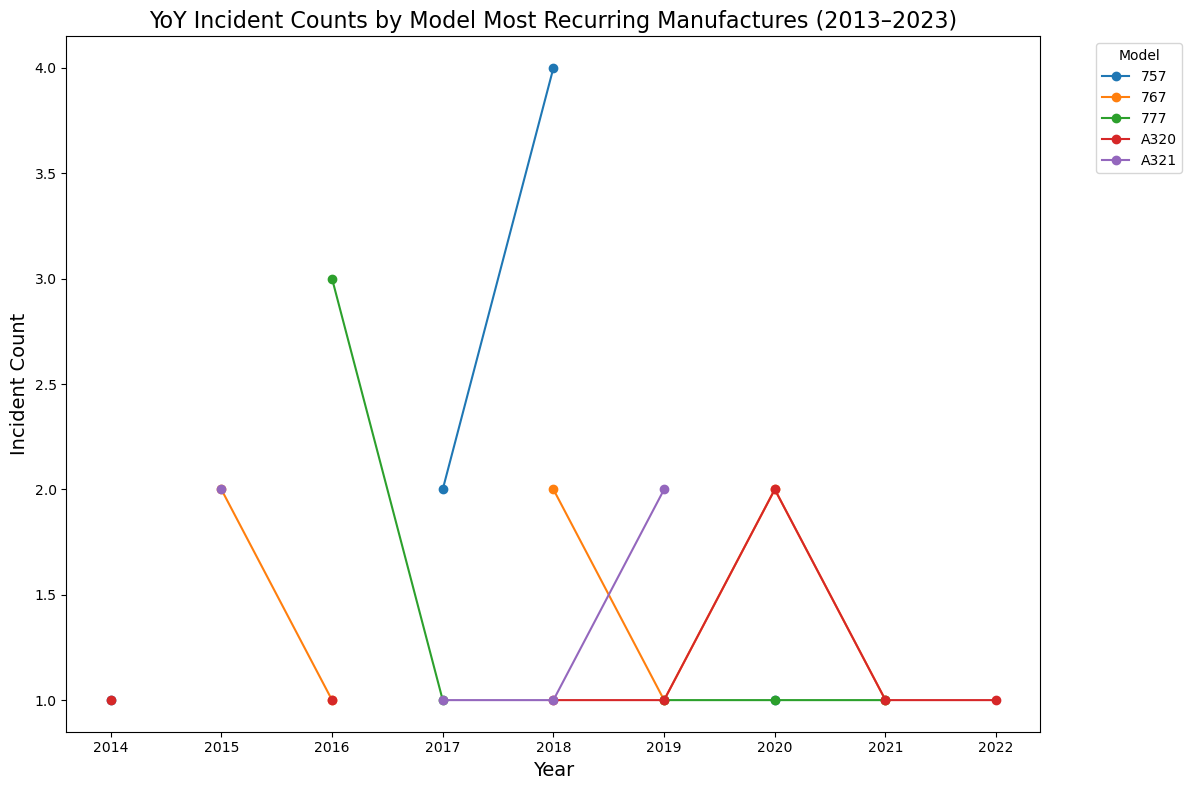

In [600]:
pivot_incidents = yoy_incident_counts.pivot(index='Year', columns='Model', values='YoY Incident Count')

plt.figure(figsize=(12, 8))
for model in pivot_incidents.columns:
    plt.plot(
        pivot_incidents.index,
        pivot_incidents[model],
        marker='o',
        label=model
    )

plt.title('YoY Incident Counts by Model Most Recurring Manufactures (2013–2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Incident Count', fontsize=14)

plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [601]:
pivot_likelihood = final_yoy_data.pivot(index='Year', columns='Model', values='Likelihood of Incident (%) YoY')

fig, ax = plt.subplots(figsize=(14, 8))

width = 0.15  # Bar width
x = pivot_likelihood.index
models = pivot_likelihood.columns

for i, model in enumerate(models):
    ax.bar(
        x + i * width,  # Adjust position of each bar
        pivot_likelihood[model],
        width=width,
        label=model
    )

ax.set_title('YoY Likelihood of Incident by Most Recurring Manufactures (2013–2023)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Likelihood of Incident (%)', fontsize=14)

ax.set_xticks(x + (len(models) - 1) * width / 2)
ax.set_xticklabels(x)

ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

KeyError: 'Likelihood of Incident (%) YoY'

In [602]:
df.to_csv("dj_finalized_eda_jan_24.csv", index=False)